##### Importing Necessary libraries 

In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 
from collections import Counter
plt.style.use('fivethirtyeight') 
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9'] 
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA'] 
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0'] 

##### Importing Data 

In [2]:
df= pd.read_csv("water_potability.csv") 
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


##### First 5 Rows of the Data 

In [3]:
df.head(5) 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


##### Last 5 Rows of the Data 

In [4]:
df.tail(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


##### Data Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


##### Describing Data

In [6]:
df.describe() 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


##### Total Null values in each column of Data

In [7]:
df.isnull().sum() 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

##### Heatmap representation of the Null values. 

<Axes: >

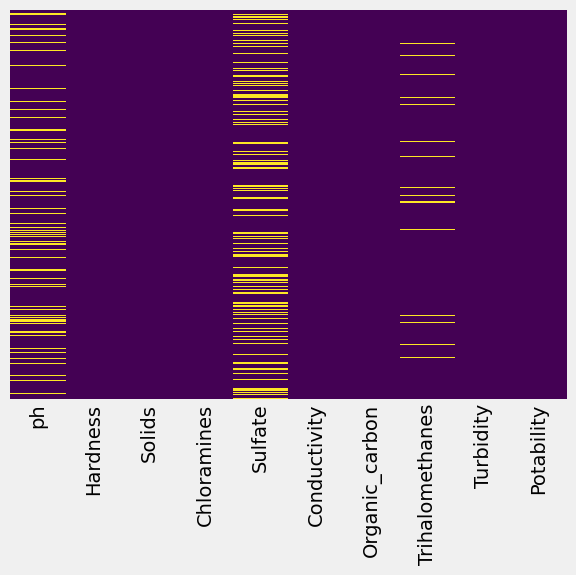

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

##### Handling the Null Values

In [9]:
df.fillna(df.mean(),inplace=True) 
df.isnull().sum() 


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

##### Heatmap representation for the Updated Null Values.

<Axes: >

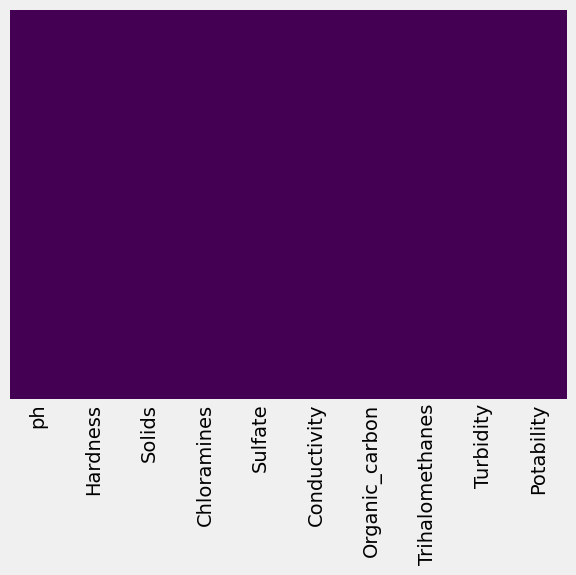

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

##### Graph for each attribute wrt to Potability attribute(0 and 1).

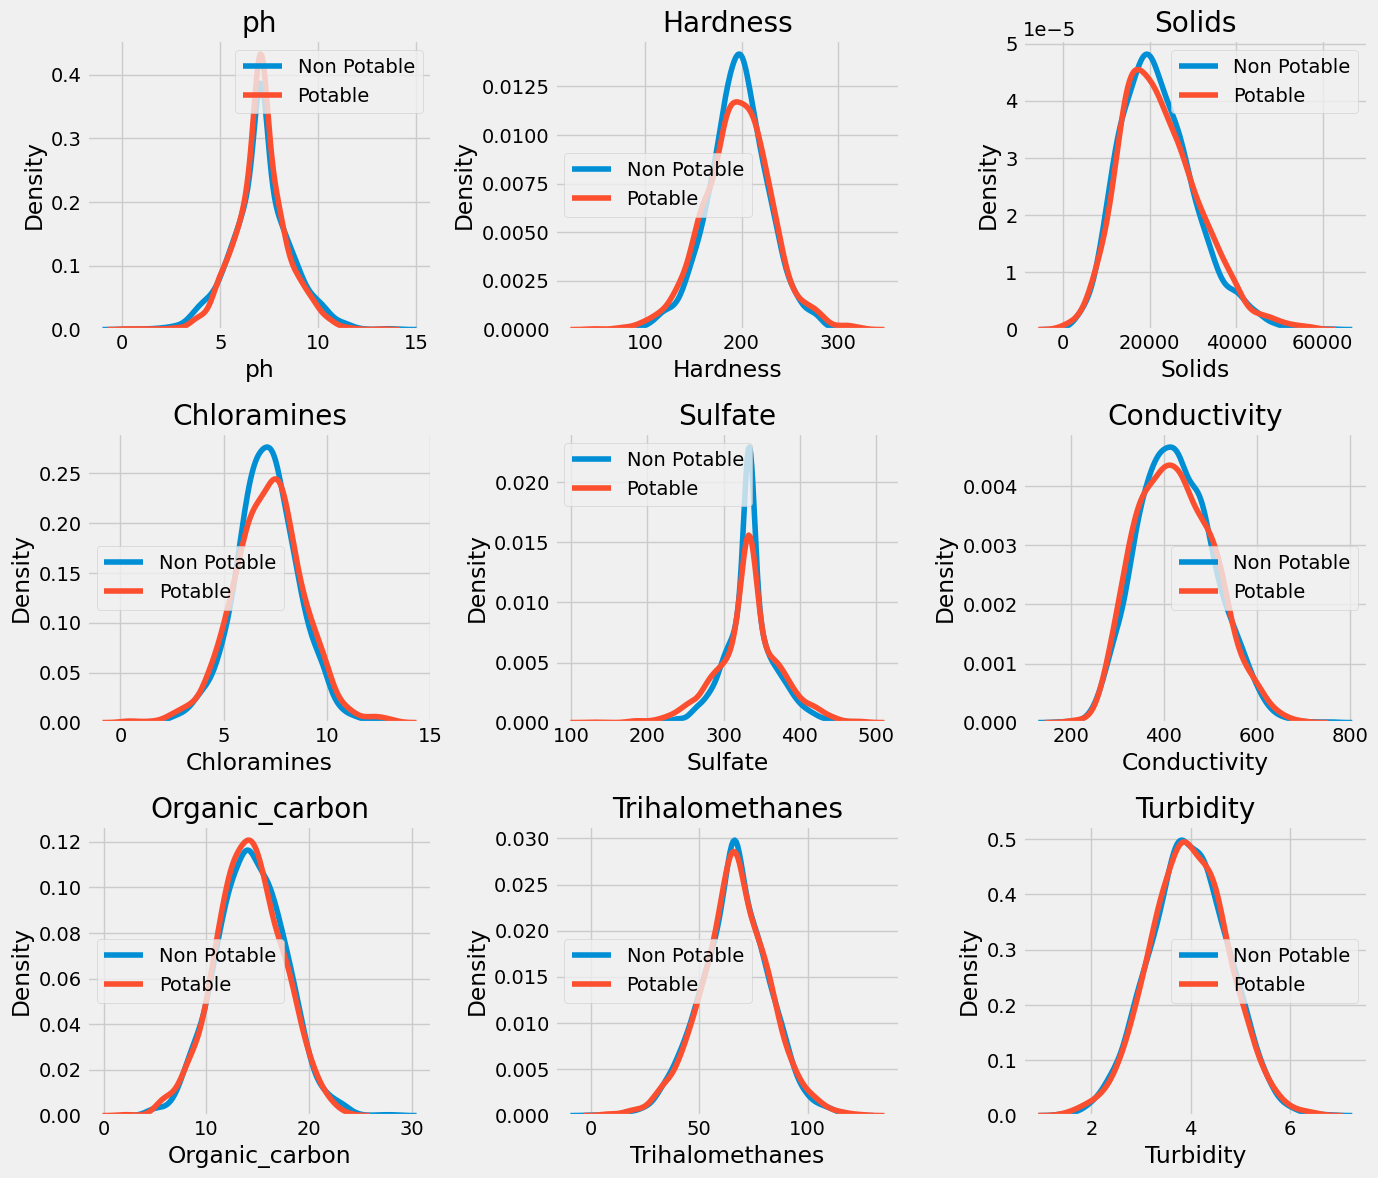

In [11]:
non_potable = df.query("Potability == 0") 
potable = df.query("Potability == 1") 
plt.figure(figsize=(14,12)) 
for row, col in enumerate(df.columns[: 9]): 
 # df.columns[: 9] because the 10th column is also "Potability"
 plt.subplot(3, 3, row + 1) 
 plt.title(col) 
 sns.kdeplot(x=non_potable[col], label="Non Potable") 
 sns.kdeplot(x=potable[col], label="Potable") 
 plt.legend() 
plt.tight_layout()

##### Potability Attribute having a values as 1 and 0 with Sns Graph.

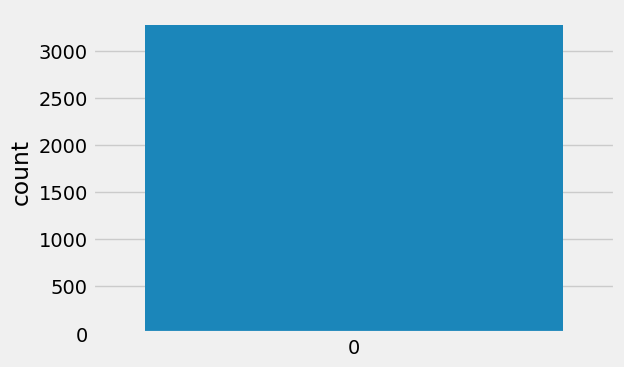

In [12]:
df.Potability.value_counts() 
plt.figure(figsize=(6, 4)) 
sns.countplot(df['Potability']) 
plt.show() 


##### Percentage Representation of Potablities in Graph

In [13]:
import plotly.express as px
import pandas as pd

# Assuming df is your original DataFrame
d = pd.DataFrame(df['Potability'].value_counts()).reset_index()

fig = px.pie(d, values='Potability', names=['Not Potable', 'Potable'], hole=0.4, opacity=0.6, color_discrete_sequence=[colors_green[3], colors_blue[3]], labels={'index': 'Potability', 'Potability': 'No. Of Samples'})
fig.add_annotation(text='We can resample the data<br> to get a balanced dataset', x=1.2, y=0.9, showarrow=False, font_size=12, opacity=0.7, font_family='monospace')
fig.add_annotation(text='Potability', x=0.5, y=0.5, showarrow=False, font_size=14, opacity=0.7, font_family='monospace')
fig.update_layout(font_family='monospace', title=dict(text='Q. How many samples of water are Potable?', x=0.47, y=0.98, font=dict(color=colors_dark[2], size=20)), legend=dict(x=0.37, y=-0.05, orientation='h', traceorder='reversed'), hoverlabel=dict(bgcolor='white'))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()


##### potability: the value counts of the data here in the dataset we can see that potability of 0 - the value count is 1998 and 1- the vaue count is 1278. By this we can say that it is an imblanced data 

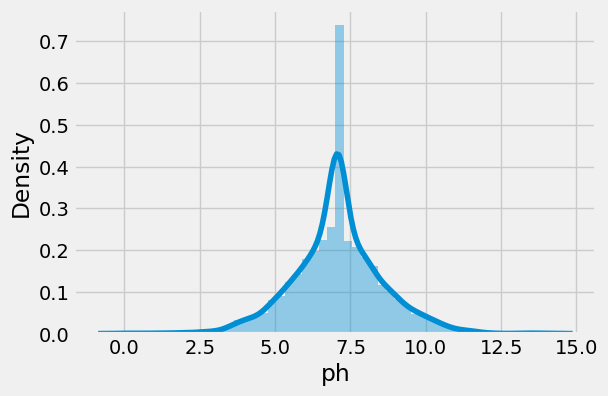

In [14]:
plt.figure(figsize=(6, 4)) 
sns.distplot(df['ph']) 
plt.show() 

##### dist plot of ph: here we can see the distribution of the plot goes as normal distribution

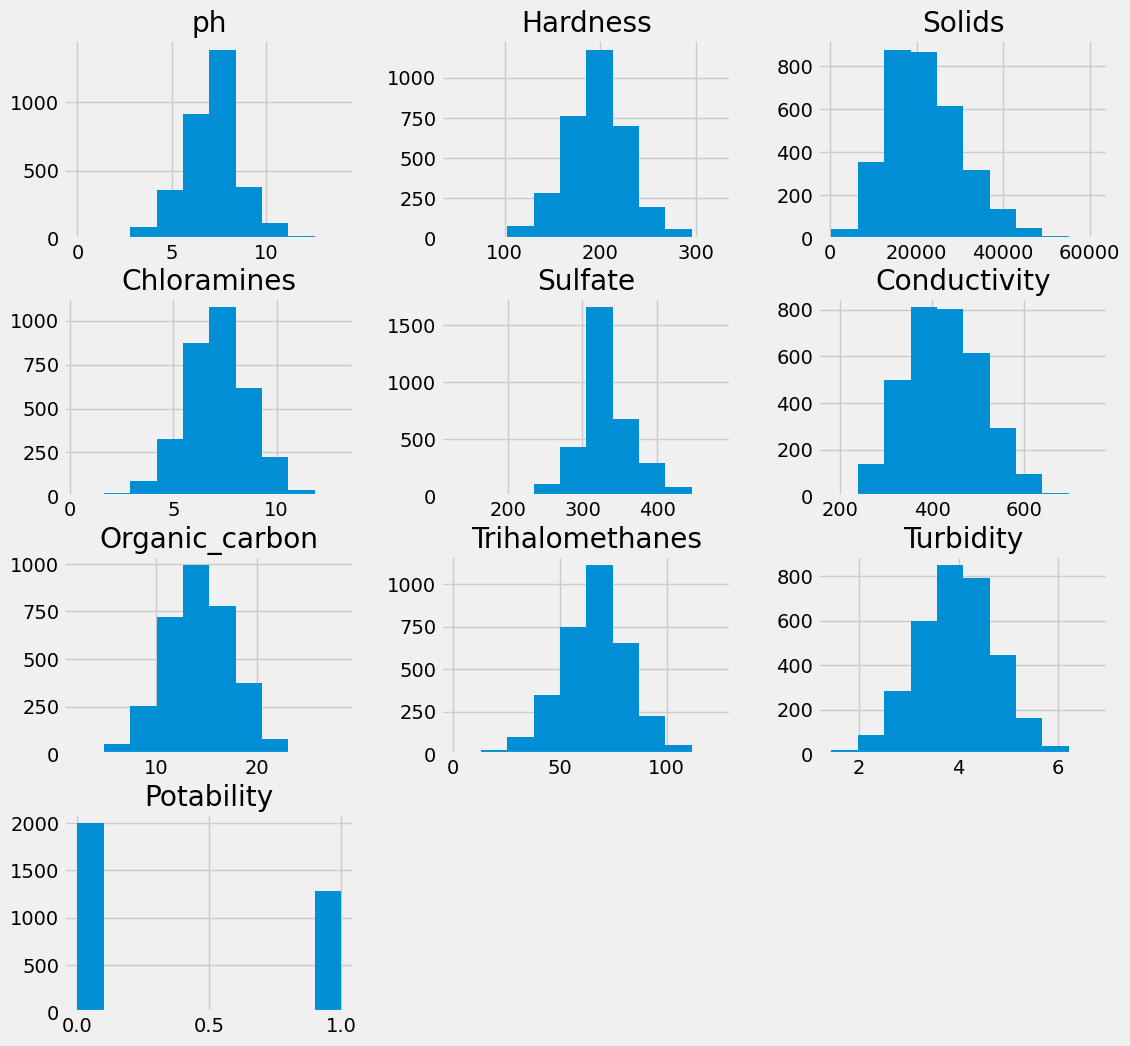

In [15]:
df.hist(figsize=(12,12)) 
plt.show() 


##### hist: here the list of all graphs shows the histogram plots of the whole dataset with each features.

##### For Hardness:

In [16]:
fig = px.histogram(df,x='Hardness',y=Counter(df['Hardness']),color='Potability',template
='plotly_white', marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]], 
 barmode='group',histfunc='count') 
fig.add_vline(x=151, line_width=1, 
line_color=colors_dark[1],line_dash='dot',opacity=0.7) 
fig.add_vline(x=301, line_width=1, 
line_color=colors_dark[1],line_dash='dot',opacity=0.7) 
fig.add_vline(x=76, line_width=1, 
line_color=colors_dark[1],line_dash='dot',opacity=0.7) 
fig.add_annotation(text='<76 mg/L is<br> considered soft',x=40,y=130,showarrow=False,font_size=9) 
fig.add_annotation(text='Between 76 and 150<br> (mg/L) is<br>moderately hard',x=113,y=130,showarrow=False,font_size=9) 
fig.add_annotation(text='Between 151 and 300 (mg/L)<br> is considered hard',x=250,y=130,showarrow=False,font_size=9) 
fig.add_annotation(text='>300 mg/L is<br> considered very hard',x=340,y=130,showarrow=False,font_size=9) 
fig.update_layout( 
 font_family='monospace', 
 title=dict(text='Hardness Distribution',x=0.53,y=0.95, 
 font=dict(color=colors_dark[2],size=20)), 
 xaxis_title_text='Hardness (mg/L)', 
 yaxis_title_text='Count', 
 legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=
5),bargap=0.3,) 
fig.show() 


##### For Solids:

In [17]:
fig = px.histogram(df,x='Solids',y=Counter(df['Solids']),color='Potability',template='plotly_white', 
 marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]], 
 barmode='group',histfunc='count') 
fig.update_layout( 
 font_family='monospace', 
 title=dict(text='Distribution Of Total Dissolved Solids',x=0.5,y=0.95, 
 font=dict(color=colors_dark[2],size=20)), 
 xaxis_title_text='Dissolved Solids (ppm)', 
 yaxis_title_text='Count', 
 legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=
5), 
 bargap=0.3, 
) 
fig.show()

##### For Chloramines:

In [18]:
fig =px.histogram(df,x='Chloramines',y=Counter(df['Chloramines']),color='Potability',template='plotly_white', 
 marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]], 
 barmode='group',histfunc='count') 
fig.add_vline(x=4, line_width=1, 
line_color=colors_dark[1],line_dash='dot',opacity=0.7) 
fig.add_annotation(text='<4 ppm is considered<br> safe for drinking',x=1.8,y=90,showarrow=False) 
fig.update_layout( 
 font_family='monospace', 
 title=dict(text='Chloramines Distribution',x=0.53,y=0.95, 
 font=dict(color=colors_dark[2],size=20)), 
 xaxis_title_text='Chloramines (ppm)', 
 yaxis_title_text='Count', 
 legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=
5), 
 bargap=0.3, 
) 
fig.show() 


##### For Conductivity:

In [19]:
fig =px.histogram(df,x='Conductivity',y=Counter(df['Conductivity']),color='Potability',template='plotly_white', 
 marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]], 
 barmode='group',histfunc='count') 
fig.add_annotation(text='The Conductivity range <br> is safe for both (200-800),<br> Potable and Non-Potable water', 
 x=600,y=90,showarrow=False) 
fig.update_layout( 
 font_family='monospace', 
 title=dict(text='Conductivity Distribution',x=0.5,y=0.95, 
 font=dict(color=colors_dark[2],size=20)), 
 xaxis_title_text='Conductivity (μS/cm)', 
 yaxis_title_text='Count', 
 legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=
5), 
 bargap=0.3, 
) 
fig.show() 

##### For Organic Carbon:

In [20]:
fig =px.histogram(df,x='Organic_carbon',y=Counter(df['Organic_carbon']),color='Potability',template='plotly_white', 
 marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]], barmode='group',histfunc='count') 
fig.add_vline(x=10, line_width=1, 
line_color=colors_dark[1],line_dash='dot',opacity=0.7) 
fig.add_annotation(text='Typical Organic Carbon<br> level is upto 10 ppm',x=5.3,y=110,showarrow=False) 
fig.update_layout( 
 font_family='monospace', 
 title=dict(text='Organic Carbon Distribution',x=0.5,y=0.95, 
 font=dict(color=colors_dark[2],size=20)), 
 xaxis_title_text='Organic Carbon (ppm)', 
 yaxis_title_text='Count', 
 legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=
5),bargap=0.3,) 
fig.show() 


##### For Turbidity:

In [21]:
fig =px.histogram(df,x='Turbidity',y=Counter(df['Turbidity']),color='Potability',template='plotly_white', 
 marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]], barmode='group',histfunc='count') 
fig.add_vline(x=5, line_width=1, 
line_color=colors_dark[1],line_dash='dot',opacity=0.7) 
fig.add_annotation(text='<5 NTU Turbidity is<br> considered safe',x=6,y=90,showarrow=False) 
fig.update_layout( 
 font_family='monospace', 
 title=dict(text='Turbidity Distribution',x=0.5,y=0.95, 
 font=dict(color=colors_dark[2],size=20)), 
 xaxis_title_text='Turbidity (NTU)', 
 yaxis_title_text='Count', 
 legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=
5), bargap=0.3,) 
fig.show() 


In [22]:
fig =px.scatter_matrix(df,df.drop('Potability',axis=1),height=1250,width=1250,template='plotly_white',opacity=0.7, 
 color_discrete_sequence=[colors_blue[3],colors_green[3]],color='Potability', 
 symbol='Potability',color_continuous_scale=[colors_green[3]
,colors_blue[3]]) 
fig.update_layout(font_family='monospace',font_size=10, 
 coloraxis_showscale=False, 
 legend=dict(x=0.02,y=1.07,bgcolor=colors_dark[4]), 
 title=dict(text='Scatter Plot Matrix b/w Features',x=0.5,y=0.97, 
 font=dict(color=colors_dark[2],size=24))) 
fig.show() 

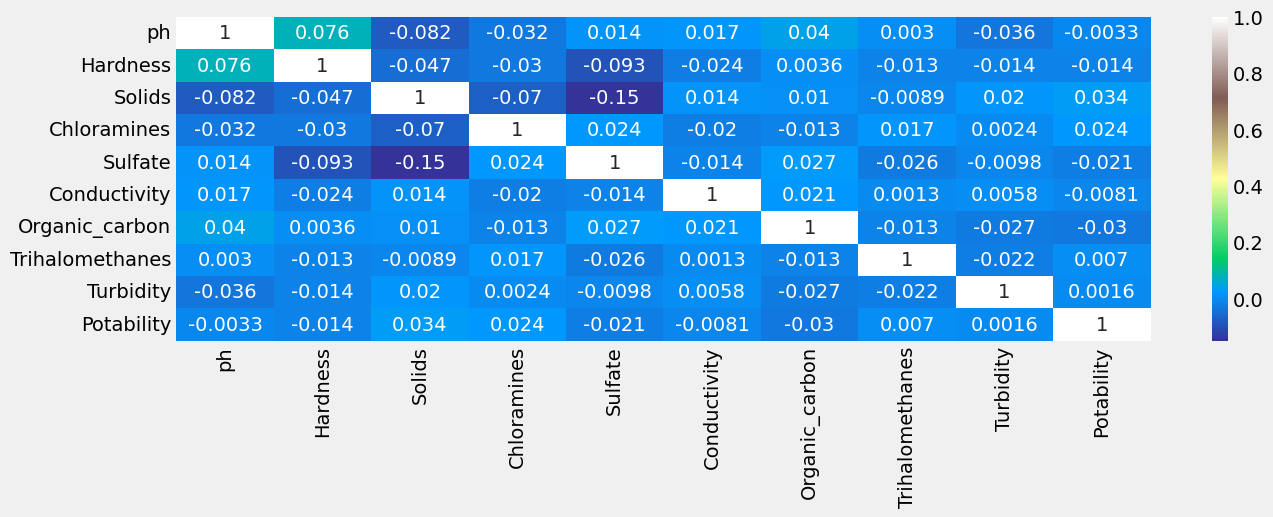

In [23]:
plt.figure(figsize=(14,4)) 
sns.heatmap(df.corr(),annot=True,cmap='terrain') 
plt.show() 


 
##### correlation:visualizing correlation using heat map function by using seaborn. we can see that there is no correlation between features it means that we cant't reduce the dimension 


<Axes: >

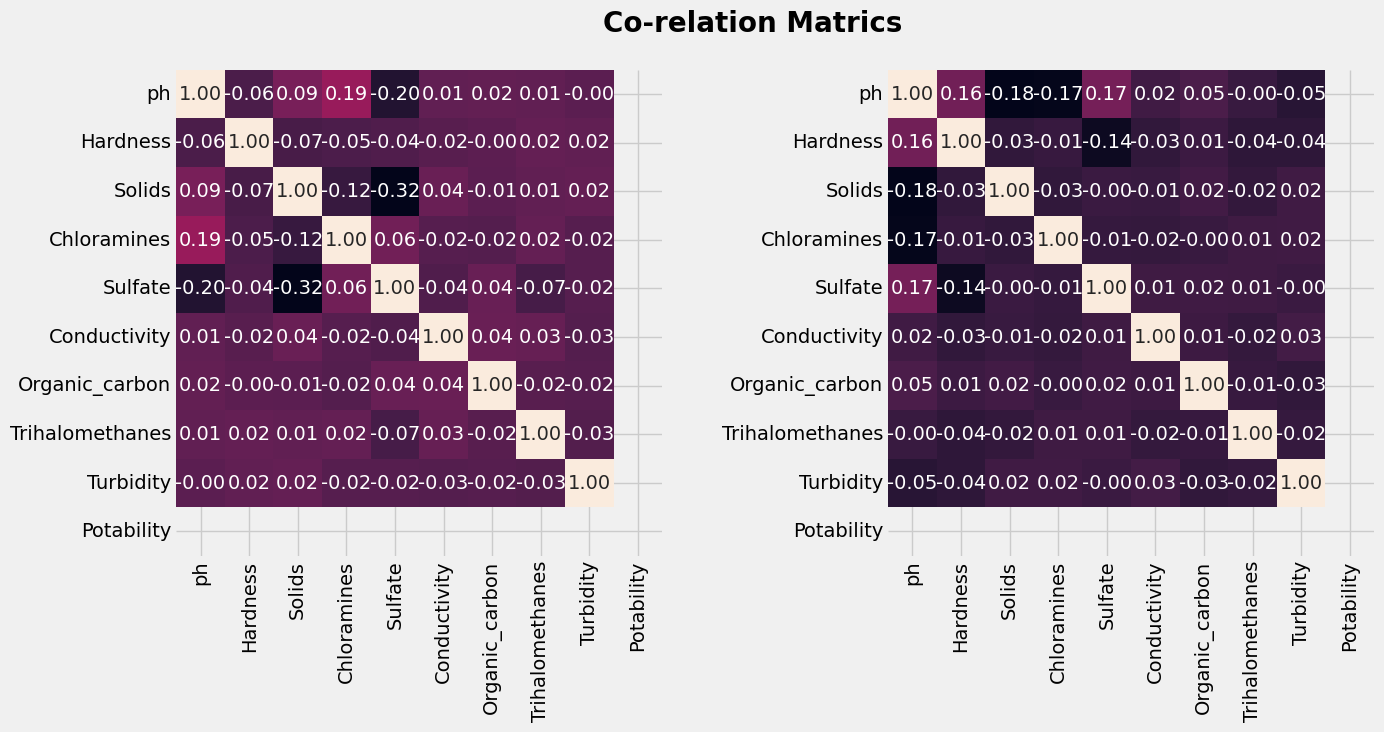

In [24]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,6)) 
plt.suptitle("Co-relation Matrics", size=20, weight='bold') 
ax=ax.flatten() 
sns.heatmap(df[df['Potability']==1].corr(), annot=True, square=True, fmt='.2f', 
ax=ax[0], cbar=False) 
sns.heatmap(df[df['Potability']==0].corr(), annot=True, square=True, fmt='.2f', 
ax=ax[1], cbar=False) 


In [25]:
# Creating the correlation matrix
correlation_matrix = df.corr() 
heatmap = go.Heatmap( 
 z=correlation_matrix, 
 x=correlation_matrix.columns, 
 y=correlation_matrix.index, 
 colorscale='viridis', 
 zmin=-1, 
 zmax=1, 
 colorbar=dict(title='Correlation') 
) 
# Creating the layout
layout = go.Layout( 
 title="Correlation Heatmap", 
 xaxis=dict(title="Features"), 
 yaxis=dict(title="Features"), 
) 
# Creating the figure
fig = go.Figure(data=heatmap, layout=layout) 
# Displaying the figure
fig.show() 


<Axes: >

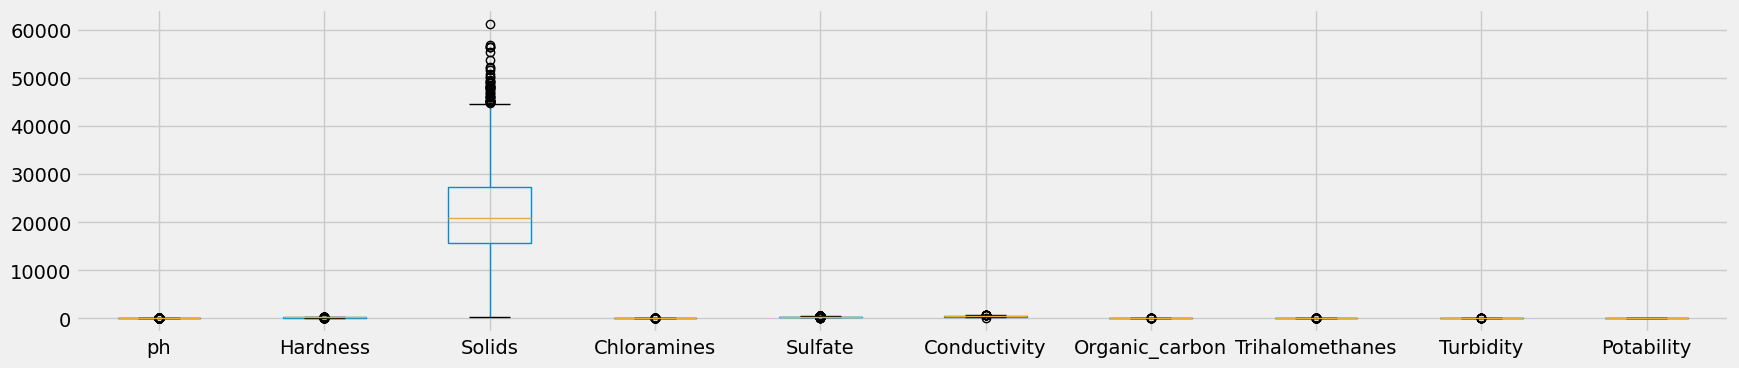

In [26]:
df.boxplot(figsize=(19,4))

 
##### box plot: here in the solid feature contains outliers but we can't remove the outliers bcz if we remove the outliers from the solid feature water will be safe to drink every time, but it contains the outlier to make thge water impure means it will tell us whether the water is safe to drink or not. so, we can't remove the outlier to train the model.

In [27]:
X = df.drop("Potability", axis=1).values
Y = df["Potability"].values

##### Confusion Matrix is a table used to evaluate the performance of a classification model in classification problems. It represents the relationship between the actual class labels and the predicted class labels by the model.The Confusion Matrix is typically a 2x2 table and includes four different values:True Positive (TP): Instances where the true positive examples are correctly predicted as positive. False Positive (FP): Instances where the true negative examples are incorrectly predicted as positive. True Negative (TN): Instances where the true negative examples are correctly predicted as negative. False Negative (FN): Instances where the true positive examples are incorrectly predicted as negative. The Confusion Matrix helps in evaluating the performance of a classification model by calculating different metrics such as: Accuracy: The ratio of TP and TN to the total number of data points. Precision: The ratio of TP to TP + FP. Recall or Sensitivity: The ratio of TP to TP + FN. F1 Score: The harmonic mean of precision and recall values. The Confusion Matrix provides a more detailed understanding of a model's classification performance and shows how well the model correctly or incorrectly predicts different classes. Precision Score : Precision Score is an evaluation metric used in classification problems. Precision is defined as the ratio of true positive predictions (TP - True Positive) to the total positive predictions (TP + FP - True Positive + False Positive). In other words, precision aims to minimize false positive predictions (FP - False Positive). Precision Score measures how well a classification model can limit false positive predictions and make accurate positive predictions. A high precision score indicates that fewer false positive predictions are made and that the majority of positive predictions are actually true positives. Precision Score is an important evaluation metric, particularly in imbalanced classification problems and situations where the cost of false positive predictions is high and minimizing false positive predictions is crucial. 

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True) 
from sklearn.preprocessing import StandardScaler
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3) 
print("X_train", X_train.shape) 
print("X_test", X_test.shape) 
print("Y_train", Y_train.shape) 
print("Y_test", Y_test.shape) 

X_train (2293, 9)
X_test (983, 9)
Y_train (2293,)
Y_test (983,)


##### Logistic Regression: 

In [29]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0).fit(X_train, Y_train) 
log.score(X_test, Y_test) 

0.6052899287894201

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


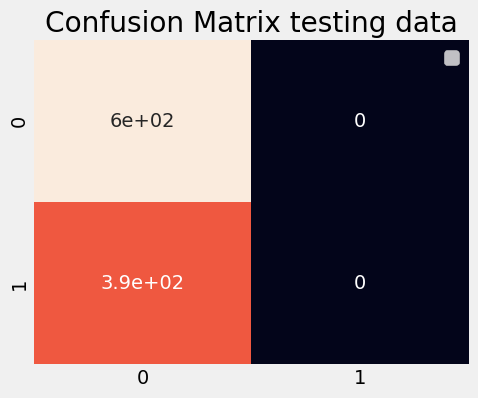

In [30]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=log.predict(np.array(X_test)) 
plt.figure(figsize=(5, 4)) 
plt.title("Confusion Matrix testing data") 
sns.heatmap(confusion_matrix(Y_test,pred1),annot=True,cbar=False) 
plt.legend() 
plt.show() 

##### K Nearest Neighbours: 

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3) 
# Train the model using the training sets
knn.fit(X_train,Y_train) 

KNeighborsClassifier(n_neighbors=3)

In [32]:
#Predict Output
predicted= knn.predict(X_test) # 0:Overcast, 2:Mild
print(accuracy_score(Y_test,predicted)) 


0.5198372329603256


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


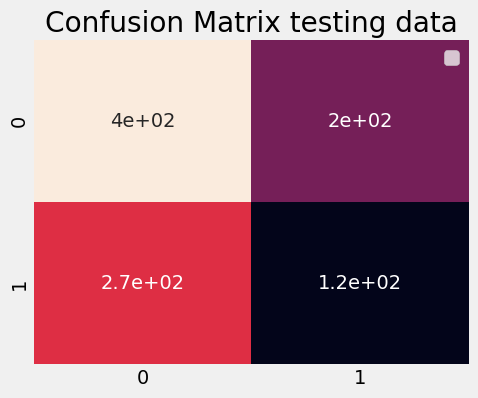

In [33]:
pred1=knn.predict(np.array(X_test))
plt.figure(figsize=(5, 4))  
plt.title("Confusion Matrix testing data") 
sns.heatmap(confusion_matrix(Y_test,pred1),annot=True,cbar=False) 
plt.legend() 
plt.show() 



##### SVM:

In [34]:
from sklearn import svm
from sklearn.metrics import accuracy_score
svmc = svm.SVC() 
svmc.fit(X_train, Y_train) 
y_pred = svmc.predict(X_test) 
print(accuracy_score(Y_test,y_pred)) 

0.6052899287894201


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


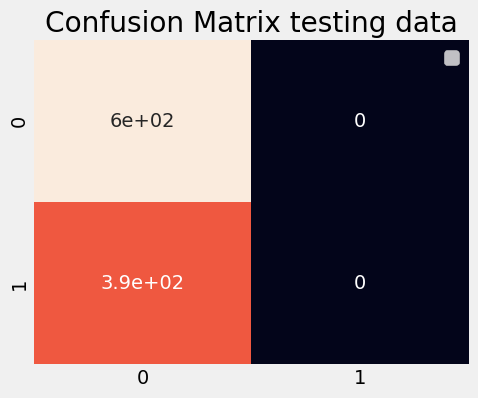

In [35]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=svmc.predict(np.array(X_test)) 
plt.figure(figsize=(5, 4)) 
plt.title("Confusion Matrix testing data") 
sns.heatmap(confusion_matrix(Y_test,pred1),annot=True,cbar=False) 
plt.legend() 
plt.show() 

##### Decision Tree: 

In [36]:
from sklearn import tree
from sklearn.metrics import accuracy_score
tre = tree.DecisionTreeClassifier() 
tre = tre.fit(X_train, Y_train) 
y_pred = tre.predict(X_test) 
print(accuracy_score(Y_test,y_pred)) 


0.5971515768056969


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


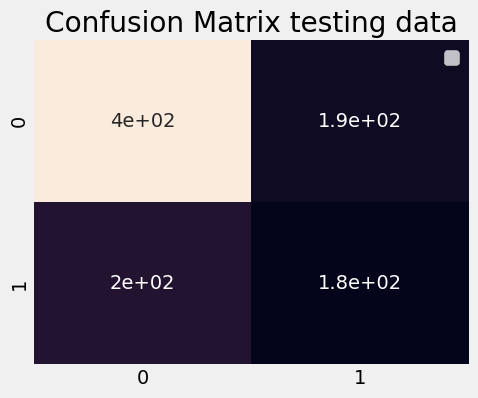

In [37]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=tre.predict(np.array(X_test)) 
plt.figure(figsize=(5, 4)) 
plt.title("Confusion Matrix testing data") 
sns.heatmap(confusion_matrix(Y_test,pred1),annot=True,cbar=False) 
plt.legend() 
plt.show() 

##### Random Forest: 

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create the model
model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, 
random_state=100) 
# fitting the model
model_rf=model_rf.fit(X_train, Y_train) 
y_pred = model_rf.predict(X_test) 
print(accuracy_score(Y_test,y_pred)) 


0.6602238046795524


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


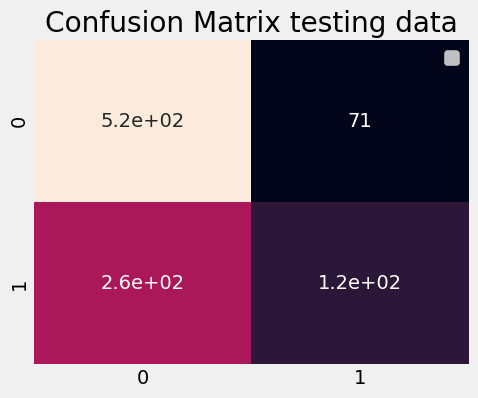

In [39]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=model_rf.predict(np.array(X_test)) 
plt.figure(figsize=(5, 4)) 
plt.title("Confusion Matrix testing data") 
sns.heatmap(confusion_matrix(Y_test,pred1),annot=True,cbar=False) 
plt.legend() 
plt.show() 